<h2 align='center'>NLP Tutorial: Text Representation - Bag Of Words (BOW)</h2>

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("spam.csv")
df.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [3]:
df.Category.value_counts()

ham     4825
spam     747
Name: Category, dtype: int64

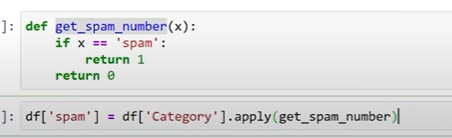

In [5]:
df['spam'] = df['Category'].apply(lambda x: 1 if x =='spam' else 0)

In [8]:
df.shape

(5572, 3)

In [6]:
df.head()

,Category,Message,spam
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0


<h3>Train test split</h3>

In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df.Message, df.spam, test_size=0.2)

In [9]:
X_train.shape

(4457,)

In [10]:
X_test.shape

(1115,)

In [11]:
type(X_train)

pandas.core.series.Series

In [16]:
X_train[:4]

1579    How to Make a girl Happy? It's not at all diff...
4992    We made it! Eta at taunton is 12:30 as planned...
4142    Beautiful truth : Expression of the face could...
1141            Oh:)as usual vijay film or its different?
Name: Message, dtype: object

In [17]:
type(y_train)

pandas.core.series.Series

In [19]:
y_train[:4]

1579    0
4992    0
4142    0
1141    0
Name: spam, dtype: int64

In [21]:
type(X_train.values)

numpy.ndarray

<h3>Create bag of words representation using CountVectorizer</h3>

In [22]:
from sklearn.feature_extraction.text import CountVectorizer

v = CountVectorizer()

X_train_cv = v.fit_transform(X_train.values)
X_train_cv

<4457x7675 sparse matrix of type '<class 'numpy.int64'>'
	with 59056 stored elements in Compressed Sparse Row format>

In [25]:
X_train_cv.toarray()[:2][0]

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [26]:
X_train_cv.shape

(4457, 7675)

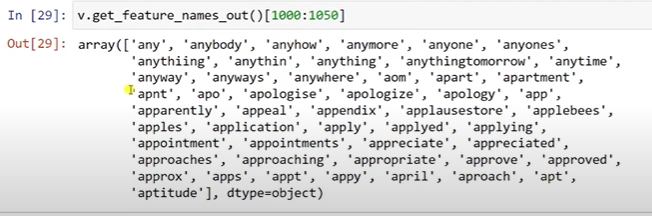

In [53]:
v.get_feature_names_out()[1771]

'chef'

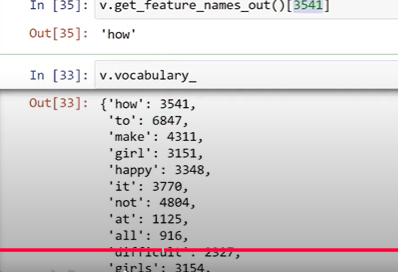

In [ ]:
v.vocabulary_

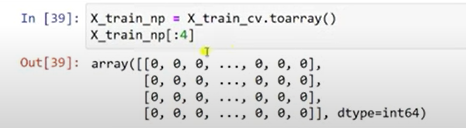

In [42]:
X_train_np = X_train_cv.toarray()
X_train_np[0]

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [41]:
np.where(X_train_np[0]!=0)

(array([ 755,  916, 1125, 1127, 1279, 1483, 1771, 1842, 1928, 2046, 2263,
        2290, 2327, 2464, 2744, 3018, 3151, 3154, 3195, 3272, 3348, 3391,
        3541, 3717, 3770, 4138, 4218, 4237, 4311, 4706, 4804, 4908, 4951,
        5117, 5423, 5425, 5432, 6474, 6588, 6847, 6966, 7184, 7191, 7302],
       dtype=int64),)

In [44]:
X_train[:4][1579]

"How to Make a girl Happy? It's not at all difficult to make girls happy. U only need to be... 1. A friend 2. Companion 3. Lover 4. Chef . . .  &lt;#&gt; . Good listener  &lt;#&gt; . Organizer  &lt;#&gt; . Good boyfriend  &lt;#&gt; . Very clean  &lt;#&gt; . Sympathetic  &lt;#&gt; . Athletic  &lt;#&gt; . Warm . . .  &lt;#&gt; . Courageous  &lt;#&gt; . Determined  &lt;#&gt; . True  &lt;#&gt; . Dependable  &lt;#&gt; . Intelligent . . .  &lt;#&gt; . Psychologist  &lt;#&gt; . Pest exterminator  &lt;#&gt; . Psychiatrist  &lt;#&gt; . Healer . .  &lt;#&gt; . Stylist  &lt;#&gt; . Driver . . Aaniye pudunga venaam.."

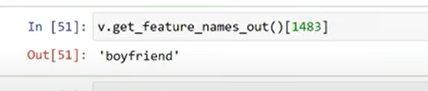
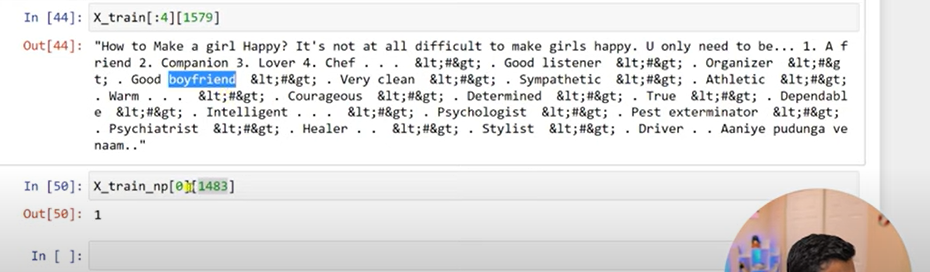

In [52]:
X_train_np[0][1771]

1

<h3>Train the naive bayes model</h3>

In [54]:
from sklearn.naive_bayes import MultinomialNB

model = MultinomialNB()
model.fit(X_train_cv, y_train)

MultinomialNB()

In [56]:
X_test_cv = v.transform(X_test)

<h3>Evaluate Performance</h3>

In [59]:
from sklearn.metrics import classification_report

y_pred = model.predict(X_test_cv)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       976
           1       0.98      0.93      0.95       139

    accuracy                           0.99      1115
   macro avg       0.98      0.96      0.97      1115
weighted avg       0.99      0.99      0.99      1115



In [60]:
emails = [
    'Hey mohan, can we get together to watch footbal game tomorrow?',
    'Upto 20% discount on parking, exclusive offer just for you. Dont miss this reward!'
]

emails_count = v.transform(emails)
model.predict(emails_count)

array([0, 1], dtype=int64)

<h3>Train the model using sklearn pipeline and reduce number of lines of code</h3>

In [61]:
from sklearn.pipeline import Pipeline

clf = Pipeline([
    ('vectorizer', CountVectorizer()),
    ('nb', MultinomialNB())
])

In [66]:
clf.fit(X_train, y_train)

Pipeline(steps=[('vectorizer', CountVectorizer()), ('nb', MultinomialNB())])

In [64]:
y_pred = clf.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       976
           1       0.98      0.93      0.95       139

    accuracy                           0.99      1115
   macro avg       0.98      0.96      0.97      1115
weighted avg       0.99      0.99      0.99      1115

